## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

dt = pd.read_csv('사교육비조사.csv')
dt.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [6]:
dt.columns

Index(['지역구분코드', '행정구역시도코드', '학교급구분코드', '방과후학교참여여부', '방과후학교참여시간수', 'EBS교재비',
       '사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수', '사교육비총비용', '총자녀수', '학생성적구분코드',
       '부_교육정도코드', '모_교육정도코드', '부모경제활동코드', '월평균가구소득코드', '진학희망고등학교유형코드'],
      dtype='object')

In [7]:
dt.head()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.0,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.0,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.0,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.0,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.0,188.862467,3,NaN,51.0,51.0,3.0,4,1.0


In [8]:
dt.tail()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
75780,4,39,4,2,0.0,0.0,0.0,0.0,0.0,0.000000,4,1.0,51.0,51.0,3.0,4,NaN
75781,4,39,4,2,0.0,0.0,0.0,0.0,0.0,0.000000,4,5.0,11.0,NaN,4.0,1,NaN
75782,4,39,4,2,0.0,0.0,1.0,0.0,1.0,166.403182,4,3.0,31.0,NaN,1.0,1,NaN
75783,4,39,4,2,0.0,0.0,5.0,0.0,5.0,147.548803,2,2.0,51.0,31.0,3.0,3,NaN
75784,4,39,4,2,0.0,0.0,5.0,5.0,0.0,190.175065,2,1.0,41.0,31.0,3.0,3,NaN


In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


In [10]:
dt.shape #데이터의 행과 열 크기

(75785, 17)

1.2 데이터의 기술통계량을 출력하세요.

In [11]:
dt.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [12]:
high = dt.query('학교급구분코드 == 3')
high #학교급구분코드가 3인 행만 출력, 30052개

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,4,39,3,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


In [13]:
high_a = high.drop(columns = '학교급구분코드') #학교급구분코드 컬럼 삭제
high_a

,지역구분코드,행정구역시도코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,4,39,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,4,39,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,4,39,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [14]:
high_b = high_a.drop(columns = ['지역구분코드', '행정구역시도코드'])
high_b

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [15]:
len(high_b.loc[high_b['방과후학교참여여부'] == 1])

18498

In [16]:
len(high_b.loc[high_b['방과후학교참여여부'] == 2])

11554

In [17]:
dummydt = pd.get_dummies(high_b, columns = ['방과후학교참여여부'])
dummydt.rename(columns = {'방과후학교참여여부_1':'참여', '방과후학교참여여부_2':'미참여'}, inplace = True)
dummydt

,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1
75679,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1
75680,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1
75681,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [18]:
data = dummydt.drop(columns = 'EBS교재비')
data

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

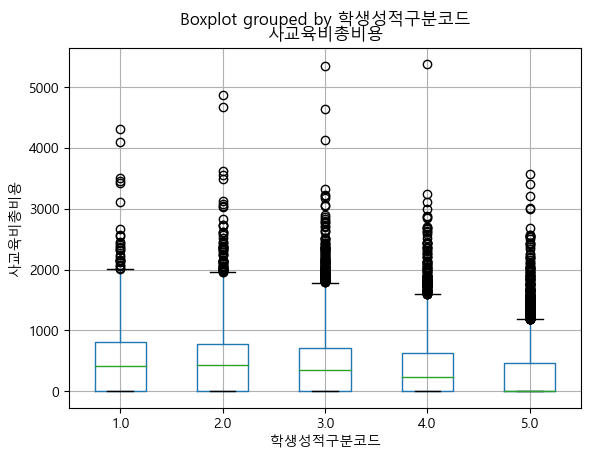

In [19]:
plt.rc('font', family='Malgun Gothic')
data.boxplot(column = '사교육비총비용', by = '학생성적구분코드')

plt.xticks([1, 2, 3, 4, 5], label = ['1.0', '2.0', '3.0', '4.0', '5.0'])
plt.ylabel('사교육비총비용')
plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [24]:
data['score'] = 0
def score_group(value):
    groups = ['상위', 3.0, '하위']
    for i in range(len(groups)):
        if value <= 2.0:
            return '상위'
        elif value >= 4.0:
            return '하위'
        else:
            return 3.0

data['score'] = [score_group(e) for e in data['학생성적구분코드']]
data

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,학생성적,score
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0,0,상위
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0,0,3.0
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0,0,하위
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0,0,하위
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0,0,하위
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1,0,하위
75679,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1,0,하위
75680,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1,0,하위
75681,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1,0,상위


In [25]:
dummydata = pd.get_dummies(data, columns = ['score'])
dummydata

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,학생성적,score_3.0,score_상위,score_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0,0,0,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0,0,1,0,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0,0,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0,0,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1,0,0,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1,0,0,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1,0,0,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1,0,0,1,0


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: Label Encoding : 알파벳 순서대로 숫자를 할당 / 단순히 문자형->정수형 변환이므로 데이터의 크기 및 shape 변화X
One Hot Encoding : 각 카테고리를 0과 1로 구성된 벡터로 표현 / 카테고리의 수만큼 새로운 컬럼이 생성되어 데이터의 크기가 늘어난다. 

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [26]:
edu = dummydata.drop(columns = 'score_3.0')
edu

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,학생성적,score_상위,score_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0,0,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0,0,0,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1,0,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1,0,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1,0,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1,0,1,0


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A: 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 
One Hot Encoding으로 모든 범주에 대해 하나씩 dummy variable을 만들면 하나의 더미변수를 다른 더미변수의 선형 조합으로 예측이 가능하기 때문에 
One Hot Encoding을 진행했을때 다중공선성 문제가 나타날 수 있다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [30]:
edutime = edu[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']]
edutime

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
4920,0.0,0.0,0.0
4921,0.0,0.0,0.0
4922,0.0,0.0,0.0
4923,0.0,0.0,0.0
4924,12.0,12.0,0.0
...,...,...,...
75678,0.0,0.0,0.0
75679,0.0,0.0,0.0
75680,0.0,0.0,0.0
75681,0.0,0.0,0.0


In [35]:
time_corr = edutime.corr()
time_corr

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
사교육참여시간수,1.000000,0.788419,0.514551
일반교과사교육시간수,0.788419,1.000000,-0.103757
예체능사교육시간수,0.514551,-0.103757,1.000000


<Axes: >

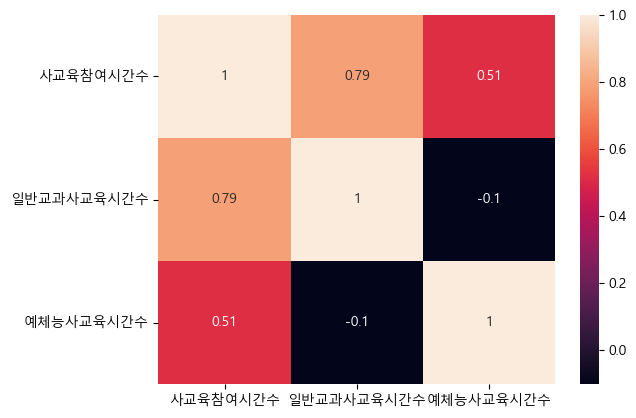

In [36]:
sns.heatmap(time_corr, annot=True)

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [56]:
edu_high = edu.drop(columns = ['진학희망고등학교유형코드', '학생성적'])
edu_high

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,참여,미참여,score_상위,score_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,1,0,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,1,0,0,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,1,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,1,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,0,1,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,0,1,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,0,1,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,0,1,1,0


In [57]:
hightime_corr = edu_high.corr()
hightime_corr

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,참여,미참여,score_상위,score_하위
방과후학교참여시간수,1.000000,-0.073166,0.003241,-0.117759,-0.049848,0.020220,-0.130770,0.018540,0.021212,0.023822,-0.013141,0.672395,-0.672395,0.097963,-0.112285
사교육참여시간수,-0.073166,1.000000,0.788419,0.514551,0.735595,-0.079460,-0.104965,0.143078,0.123589,-0.015223,0.199973,-0.093624,0.093624,0.066961,-0.102239
일반교과사교육시간수,0.003241,0.788419,1.000000,-0.103757,0.710651,-0.086778,-0.213740,0.172584,0.148528,-0.023818,0.225023,0.030808,-0.030808,0.154882,-0.197169
예체능사교육시간수,-0.117759,0.514551,-0.103757,1.000000,0.202356,-0.009279,0.116939,-0.002895,-0.001068,0.007605,0.013496,-0.187576,0.187576,-0.100439,0.098388
사교육비총비용,-0.049848,0.735595,0.710651,0.202356,1.000000,-0.113759,-0.159312,0.246698,0.219580,-0.036803,0.323621,-0.056124,0.056124,0.110025,-0.150224
총자녀수,0.020220,-0.079460,-0.086778,-0.009279,-0.113759,1.000000,0.037984,-0.069922,-0.116177,0.007841,-0.041969,0.033062,-0.033062,-0.028043,0.037129
학생성적구분코드,-0.130770,-0.104965,-0.213740,0.116939,-0.159312,0.037984,1.000000,-0.158326,-0.147830,0.021191,-0.117777,-0.190125,0.190125,-0.806036,0.847790
부_교육정도코드,0.018540,0.143078,0.172584,-0.002895,0.246698,-0.069922,-0.158326,1.000000,0.595312,-0.062360,0.328736,0.017017,-0.017017,0.135816,-0.126459
모_교육정도코드,0.021212,0.123589,0.148528,-0.001068,0.219580,-0.116177,-0.147830,0.595312,1.000000,-0.013845,0.314560,0.018701,-0.018701,0.134846,-0.111483
부모경제활동코드,0.023822,-0.015223,-0.023818,0.007605,-0.036803,0.007841,0.021191,-0.062360,-0.013845,1.000000,0.075738,0.017311,-0.017311,-0.018646,0.015867


<Axes: >

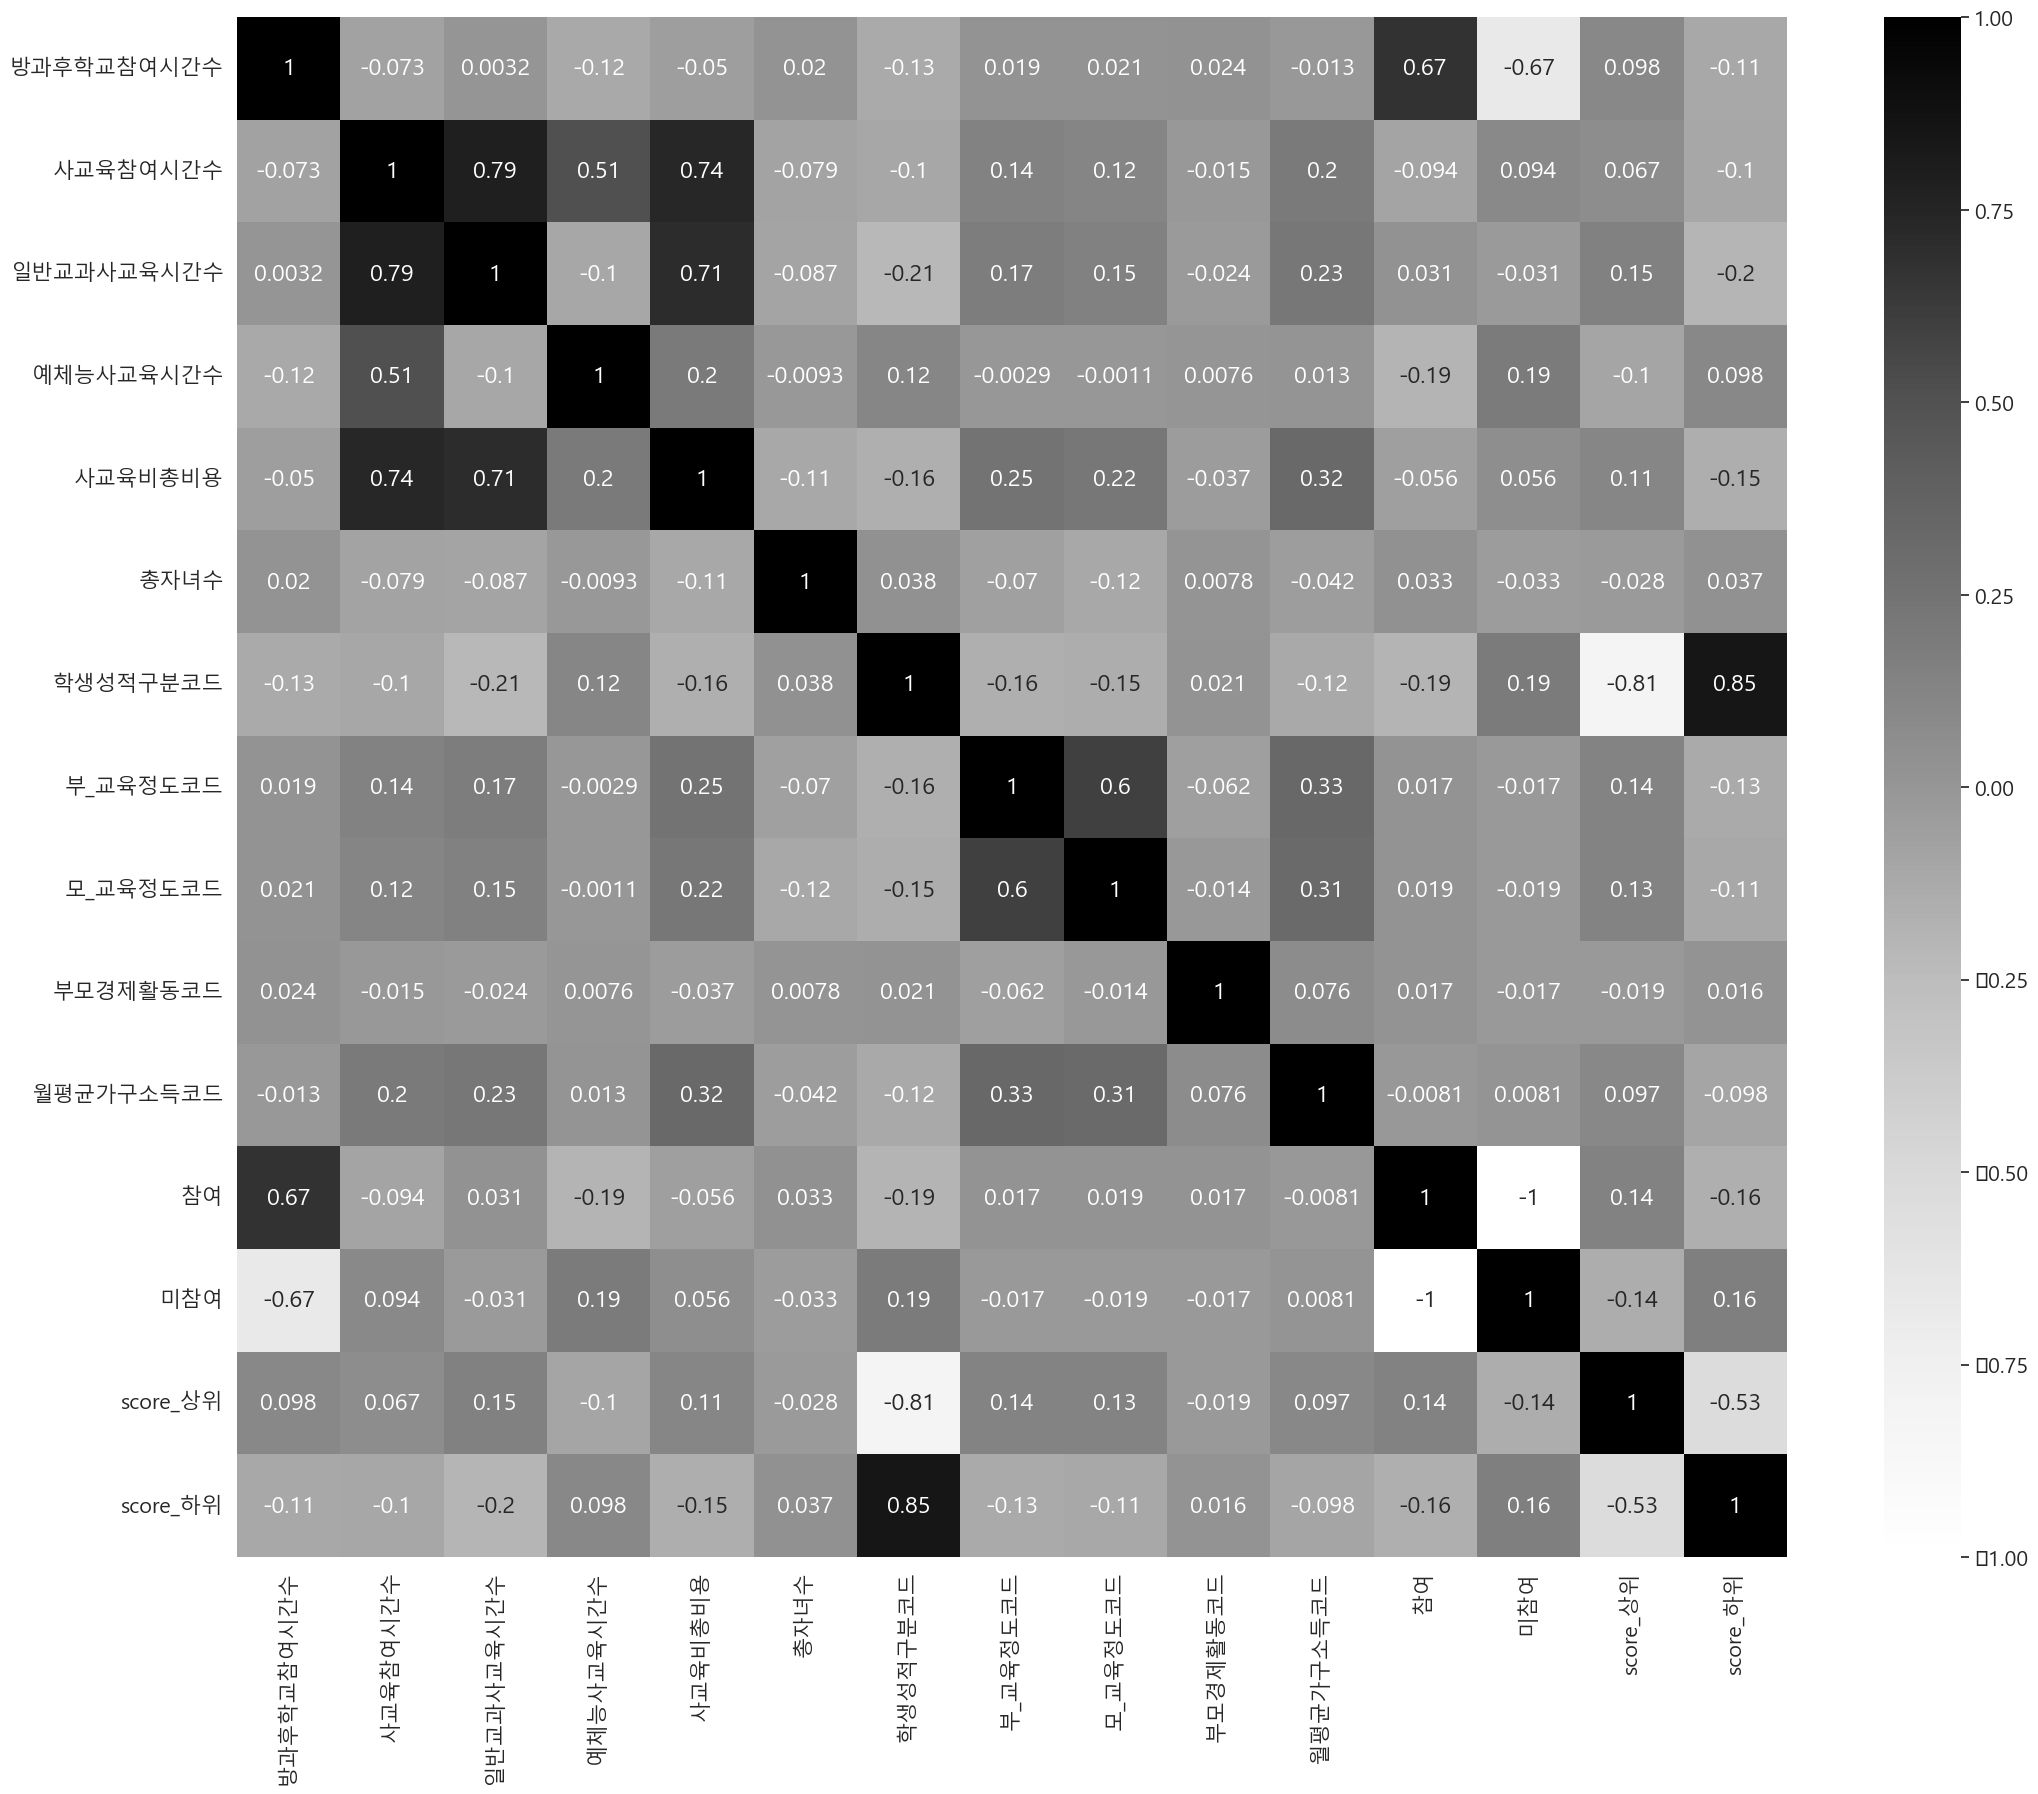

In [59]:
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(1, 1, figsize = (25,20))
sns.heatmap(hightime_corr, cmap = 'Greys', annot=True)

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [61]:
edu_high.isnull().sum() #결측치 개수 확인, 코드집을 통해 결측값은 부 or 모 or 둘다 안계심인 것을 확인

방과후학교참여시간수       0
사교육참여시간수         0
일반교과사교육시간수       0
예체능사교육시간수        0
사교육비총비용          0
총자녀수             0
학생성적구분코드         0
부_교육정도코드      1569
모_교육정도코드       978
부모경제활동코드       105
월평균가구소득코드        0
참여               0
미참여              0
score_상위         0
score_하위         0
dtype: int64

In [70]:
edu_none = edu_high.fillna(0) #결측값을 0으로 채움
edu_none

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,참여,미참여,score_상위,score_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,1,0,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,1,0,0,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,1,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,1,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,0,1,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,0,1,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,0,1,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,0,1,1,0


In [86]:
edu_none['사교육비총비용'].max()

5374.156458

In [87]:
edu_none['사교육비총비용'].min()

0.0

In [71]:
#훈련데이터셋과 테스트데이터셋 나누기
from sklearn.model_selection import train_test_split
x = edu_none.drop(columns = '사교육비총비용')
y = edu_none['사교육비총비용']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, random_state=42)

In [95]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성
lr = LinearRegression()
reg = lr.fit(x_train, y_train)

print(reg.score(x_train, y_train)) #결정계수 출력

0.6211497020948549


In [97]:
from sklearn.metrics import mean_squared_error

y_pred_lr = lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr

93011.24567071325

In [101]:
#사교육비총비용에 영향을 주는 값 : 부&모_교육정도코드, 방과후학교참여시간수
x1 = edu_none[['부_교육정도코드', '모_교육정도코드', '방과후학교참여시간수']]
y1 = edu_none['사교육비총비용']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                                    test_size=0.2, random_state=42)
lr1 = LinearRegression()
reg1 = lr1.fit(x1_train, y1_train)

print(reg1.score(x1_train, y1_train)) #결정계수 출력

0.07951279830350622


In [102]:
y1_pred_lr = lr1.predict(x1_test)
mse1_lr = mean_squared_error(y1_test, y1_pred_lr)
mse1_lr

223694.1524928593